# Studying the stars with Gaia and pandas

The Tycho-Gaia Astrometric Solution (TGAS) is a collection of 2.5 million stars identified by the Gaia astronomical observatory, a spacecraft launched in 2013. In this notebook, you will practice your pandas skills with a fraction of that dataset.

First, import pandas and matplotlib.pyplot:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now, open the "TGAS_data.csv" file:

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Unit 3- Astrophysics/TGAS_data.csv")

Look at the first five rows of the dataframe:

In [ ]:
df.head()

,TYC2 ID,Epoch,RA (deg),RA err (mas),Dec (deg),Dec err (mas),Parallax (mas),Parallax err (mas)
0,1-1001-1,2015,1.414659,0.483,2.448821,0.249,2.96,0.59
1,1-1009-1,2015,0.137272,0.453,0.721016,0.195,5.77,0.73
2,1-1016-1,2015,0.426679,0.456,1.786809,0.169,2.66,0.59
3,1-1021-1,2015,0.484126,0.388,0.434794,0.151,3.16,0.52
4,1-1024-1,2015,1.080285,0.347,0.875576,0.124,2.63,0.46


How many rows are there in this dataframe?

In [ ]:
len(df)

993037

You might notice that one of the columns contains the parallax angle for each star (remember: nearby objects have a larger parallax angle than far away objects).

Store the "parallax" column in a variable.

In [ ]:
parallax_angle = df["Parallax (mas)"]

Find the min, max, and mean parallax angle for this dataset:

In [ ]:
print(parallax_angle.min())
print(parallax_angle.max())
print(parallax_angle.mean())

-24.82
120.59
2.4250942311313683


Sort the entire dataframe by parallax angle from largest to smallest and print out the first 10 rows of the sorted dataframe.

In [ ]:
# Remember to assign your sorted dataframe to a new variable
df_sorted = df.sort_values(["Parallax (mas)"], ascending = False)
df_sorted.head(10)

,TYC2 ID,Epoch,RA (deg),RA err (mas),Dec (deg),Dec err (mas),Parallax (mas),Parallax err (mas),Distance (par)
600536,3980-1081-1,2015,327.909017,0.768,59.294450,0.785,120.59,0.96,8.292562
696461,4378-2162-2,2015,133.836686,0.381,70.792196,0.518,87.54,0.59,11.423349
626905,4041-1365-1,2015,30.394817,0.228,63.769605,0.236,84.54,0.30,11.828720
696460,4378-2162-1,2015,133.836474,0.597,70.793037,0.851,81.89,0.96,12.211503
633075,4067-242-1,2015,58.293768,0.845,62.567786,0.341,81.24,0.47,12.309207
745577,4618-116-1,2015,109.990312,0.334,84.076924,0.514,80.16,0.66,12.475050
906485,6403-440-1,2015,354.532769,0.421,-16.236492,0.307,78.56,0.80,12.729124
565736,3819-1043-1,2015,157.604095,0.148,55.998993,0.328,77.41,0.27,12.918228
695664,4375-2402-1,2015,128.944995,0.226,68.066859,0.276,76.94,0.38,12.997141
786708,4835-774-1,2015,115.012365,0.362,-3.604870,0.221,71.17,0.36,14.050864


## Selecting a particular value in a dataframe
You can index a single item from a row of the dataframe by specifying the column and then the row index as follows:

In [ ]:
# This code will select the Parallax from the star in row ID 600536
df["Parallax (mas)"][600536] 

120.59

Try it yourself! Find the Parallax angle for the star in row index 1.

In [ ]:
# Use the following format: df[column name/variable][row index]
df["Parallax (mas)"][1]

5.77

Now find the TYC2 ID for this star"

In [ ]:
df["TYC2 ID"][1]

'1-1009-1    '

## Let's calculate the distance to these stars based on their parallax angle
The parallax angle in this database is measured in milliarcseconds (mas). Add a column called "Distance (par)" using the following formula to calculate distance in parsecs: 

distance (par) = 1 / (parallax/1000)

In [ ]:
df["Distance (par)"] = 1/(parallax_angle/1000)

Check your dataframe using the .head() method:

In [ ]:
df.head(10)

,TYC2 ID,Epoch,RA (deg),RA err (mas),Dec (deg),Dec err (mas),Parallax (mas),Parallax err (mas),Distance (par)
0,1-1001-1,2015,1.414659,0.483,2.448821,0.249,2.96,0.59,337.837838
1,1-1009-1,2015,0.137272,0.453,0.721016,0.195,5.77,0.73,173.310225
2,1-1016-1,2015,0.426679,0.456,1.786809,0.169,2.66,0.59,375.939850
3,1-1021-1,2015,0.484126,0.388,0.434794,0.151,3.16,0.52,316.455696
4,1-1024-1,2015,1.080285,0.347,0.875576,0.124,2.63,0.46,380.228137
5,1-1040-1,2015,0.398501,0.399,0.444751,0.154,4.10,0.52,243.902439
6,1-1044-1,2015,0.453174,0.421,0.604862,0.163,2.73,0.57,366.300366
7,1-1058-1,2015,0.167046,0.438,0.314987,0.174,7.60,0.50,131.578947
8,1-1063-1,2015,1.438581,0.770,0.582564,0.359,-0.10,0.87,-10000.000000
9,1-1072-1,2015,1.251000,0.682,2.056585,0.311,1.14,0.70,877.192982


Find the min, max, and average distance:

In [ ]:
distance = df["Distance (par)"]
print(min(distance))
print(max(distance))
print(distance.mean())

-99999.99999999999
99999.99999999999
747.2266340679466


Why are there negative distances? Can you find anything in the data that could explain this?

## Looking at the distribution of distances
The mean is helpful when it comes to learning about the average distance in parsecs to the stars we can measure with Gaia, but it doesn't give us the whole picture. Let's create a graph called a "histogram" that shows us how many stars have distances in each range.

There's a simple matplotlib.pyplot function for this called plt.hist()

The plt.hist() function takes three arguments: 
- The dataframe index (or variable) that you want to look at
- *optional* The number of ranges
- *optional* (x min, x max)

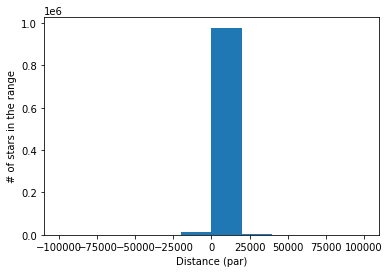

In [ ]:
# First let's try the simplest version. Just use the dataframe index or variable for the distance column:
# Don't use the other two arguments for now:
plt.hist(df["Distance (par)"])
plt.xlabel("Distance (par)")
plt.ylabel("# of stars in the range")
plt.show()


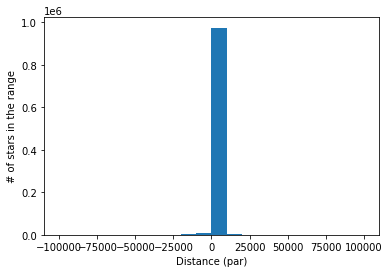

In [ ]:
# We can split the data up into more ranges if we specify a number. Try adding 20 as the second argument:
plt.hist(df["Distance (par)"], 20)
plt.xlabel("Distance (par)")
plt.ylabel("# of stars in the range")
plt.show()

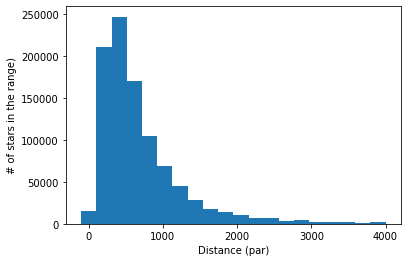

In [ ]:
# There are so few stars in the very negative and very positive distances that it's skewing our results.
# Let's try specifying a min and max range of (-100, 4000)
plt.hist(df["Distance (par)"], 20, (-100, 4000))
plt.xlabel("Distance (par)")
plt.ylabel("# of stars in the range)")
plt.show()